In [373]:
import numpy as np
from tqdm.notebook import tqdm
import time
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import RegularPolygon
import itertools
import time
import matplotlib.cm as cm

In [631]:
def draw_map(coords, colors):
    xcoord = coords[:, 0]
    ycoord = 2. * np.sin(np.radians(60)) * (coords[:, 1] - coords[:, 2]) /3.

    fig, ax = plt.subplots(1, figsize=(20, 20))
    ax.set_aspect('equal')
    patch_list = []
    for x, y, c in zip(xcoord, ycoord, colors):
        hexes = patch.RegularPolygon((x, y), numVertices=6, radius=(2/3), orientation=np.radians(30), facecolor=c, edgecolor='k', linewidth=.25)
        patch_list.append(hexes)

    hexes = PatchCollection(patch_list, match_original=True)
    ax.add_collection(hexes)
    ax.axis('off')
    ax.scatter(xcoord, ycoord, alpha=0)
    plt.show()

In [632]:
def make_coords(size=3):
    coords = set()
    coords.add((0, 0, 0))
    possibles = range(-size, size + 1)
    for pair in itertools.product(possibles, repeat=3):
        if sum(pair) == 0:
            coords.add(pair)
    return np.array(list(coords))

def random_colors(coords):
    num = len(coords)
    choices = [red, blue, yellow, green, unclaimed, ocean]
    results = np.random.choice(choices, size=num)
    return results

def water_and_land(coords, sea_level=.25, alpha=.5, steepness=2, stickiness=2):
    vecs = []
    for pt in coords:
        r = np.sqrt(np.random.uniform(0, 1)) * (1 / stickiness)
        theta = np.random.uniform(0, 1) * 2 * np.pi
        x = r * np.cos(theta)
        y = r * np.sin(theta)
        vecs.append((x, y))
    vecs = np.array(vecs)

    height = []
    for i, node in enumerate(coords):
        adjs = (cdist((node,), coords) < 2)[0]
        argadj = np.nonzero(adjs)
        dot = np.multiply(vecs[i], vecs[argadj]).sum(1)
        height.append(np.mean(dot))

    
    xcoord = coords[:, 0]
    ycoord = 2. * np.sin(np.radians(60)) * (coords[:, 1] - coords[:, 2]) /3.

    xweight = 2 * (xcoord - min(xcoord))/(max(xcoord) - min(xcoord)) - 1
    yweight = 2 * (ycoord - min(ycoord))/(max(ycoord) - min(ycoord)) - 1

    weights = steepness * (np.exp(-xweight**2 - yweight**2) -.5)

    locs = np.column_stack((xcoord, ycoord))
    mapped = alpha * (np.exp(height) / (1 + np.exp(height)))  + (1 - alpha) * weights

    cols = [ocean if h < sea_level else green for h in mapped]
    return cols



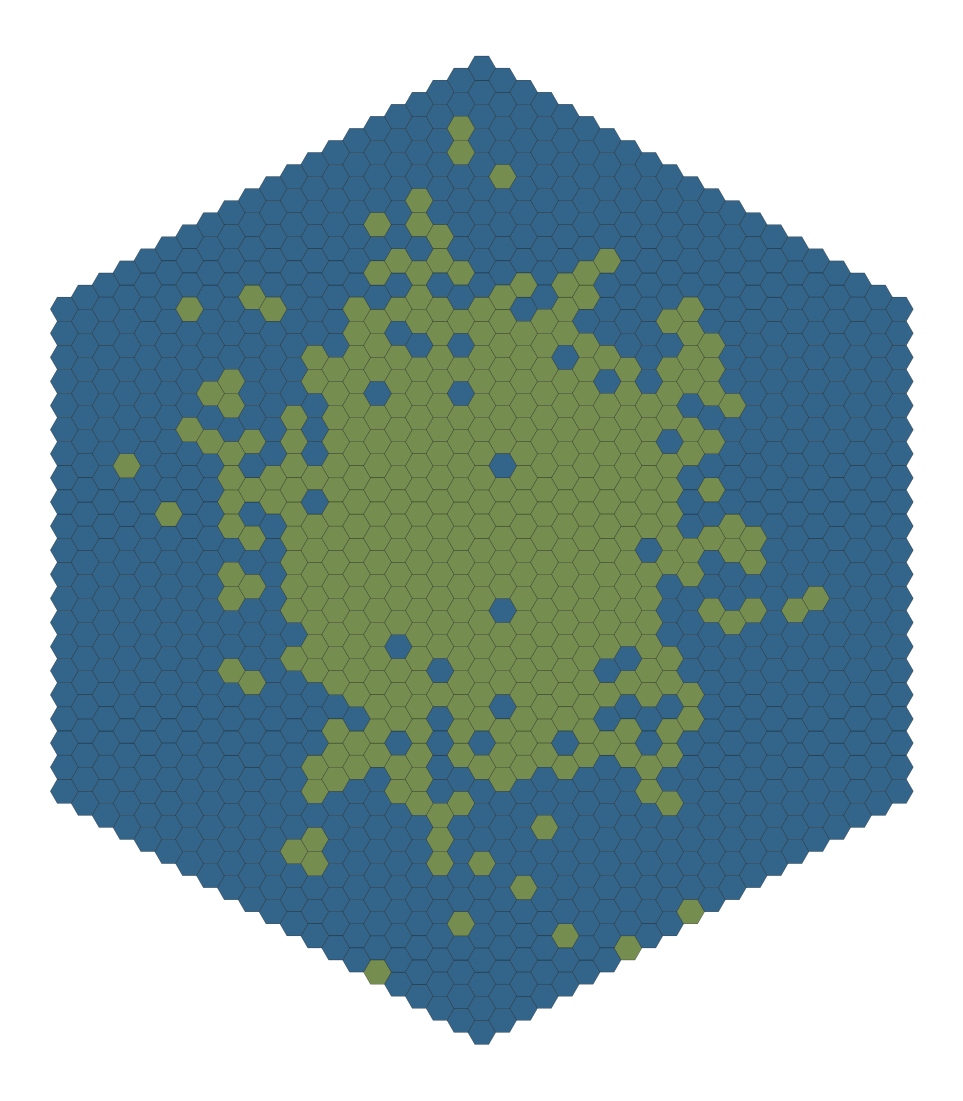

In [653]:
red = '#982649'
blue = '#60B2E5'
yellow = '#F6AE2D'
green = '#758E4F'
ocean = '#33658A'
unclaimed = '#F9DBBD'
coord_mask = make_coords(20)
colors = water_and_land(coord_mask, sea_level=.49, alpha=.95, steepness=1, stickiness=2.3)
draw_map(coord_mask, colors)